In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/archive/data'
classes = os.listdir(path)
print(classes)

['desert', 'green_area', 'cloudy', 'water']


In [4]:
def preprocess(img_path):
    try:
        # Attempt to read the image
        image = cv2.imread(img_path)

        # Check if the image is empty
        if image is None:
            raise Exception(f"Error: Unable to read image at {img_path}")

        # Resize the image
        img = cv2.resize(image, (224, 224),interpolation=cv2.INTER_AREA)  # Adjust the target size as needed

        # Convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        return img

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

In [5]:
img = []
label = []
# encoder = LabelEncoder()
# encoder.fit(classes)
for class_label in classes:
  class_path = os.path.join(path,class_label)
  i = 0

  for filename in (os.listdir(class_path)):
    img_path = os.path.join(class_path,filename)
    image = preprocess(img_path)
    img.append(image)
    label.append(class_label)
    i+=1
    if i == 1000:
      break

actual_label = label
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(actual_label)
images = np.array(img)
labels = np.array(labels_encoded)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


In [9]:
images.shape

(4000, 224, 224)

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(images,labels,random_state = 28,shuffle = True,test_size=0.25)

In [11]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((3000, 224, 224), (3000,), (1000, 224, 224), (1000,))

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = 3,padding = 'same',activation='relu',input_shape = (224,224,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(64,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer = 'adamax',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 3,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/3
94/94 [==============================] - 931s 10s/step - loss: 5.5805 - accuracy: 0.2603 - val_loss: 1.3200 - val_accuracy: 0.2660
Epoch 2/3
94/94 [==============================] - 909s 10s/step - loss: 1.2834 - accuracy: 0.2527 - val_loss: 1.2610 - val_accuracy: 0.2760
Epoch 3/3
94/94 [==============================] - 886s 9s/step - loss: 1.2574 - accuracy: 0.3007 - val_loss: 1.2467 - val_accuracy: 0.4670


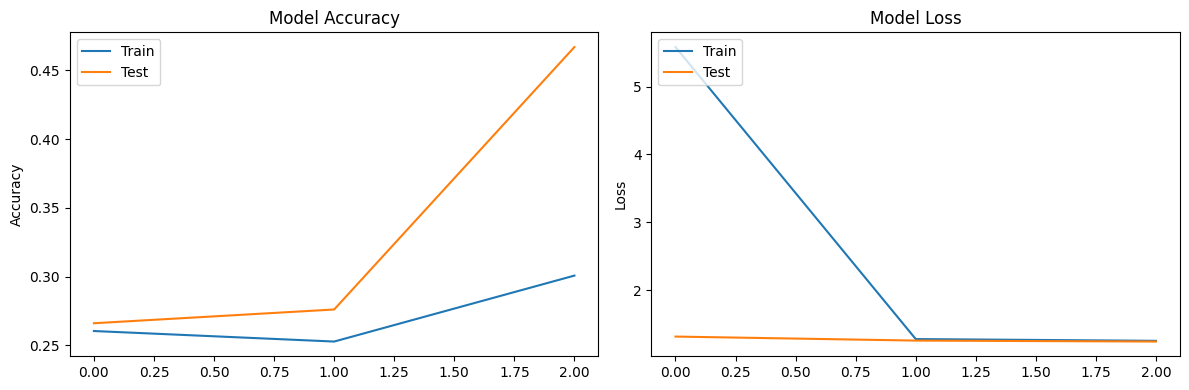

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 73s 2s/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.467

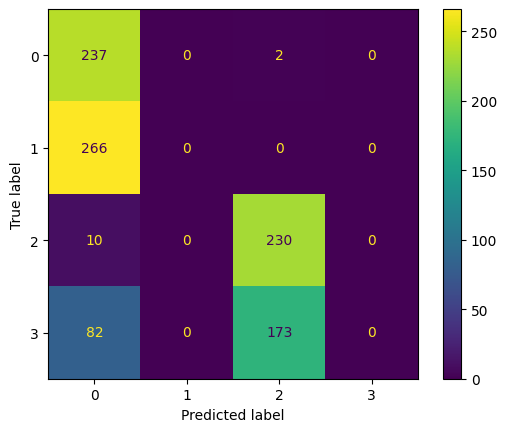

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Alex Net


In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Block 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Block 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))  # Change 1000 to the number of classes in your task

model.summary()  # Display model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
model.compile(optimizer = 'adamax',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 5,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/5
94/94 [==============================] - 481s 5s/step - loss: 4.4051 - accuracy: 0.2497 - val_loss: 1.2608 - val_accuracy: 0.2660
Epoch 2/5
94/94 [==============================] - 473s 5s/step - loss: 1.2224 - accuracy: 0.3850 - val_loss: 1.1069 - val_accuracy: 0.4710
Epoch 3/5
94/94 [==============================] - 475s 5s/step - loss: 1.0361 - accuracy: 0.4783 - val_loss: 0.9296 - val_accuracy: 0.4720
Epoch 4/5
94/94 [==============================] - 466s 5s/step - loss: 0.8680 - accuracy: 0.5267 - val_loss: 0.9462 - val_accuracy: 0.4530
Epoch 5/5
94/94 [==============================] - 474s 5s/step - loss: 0.7664 - accuracy: 0.5830 - val_loss: 0.7752 - val_accuracy: 0.5060


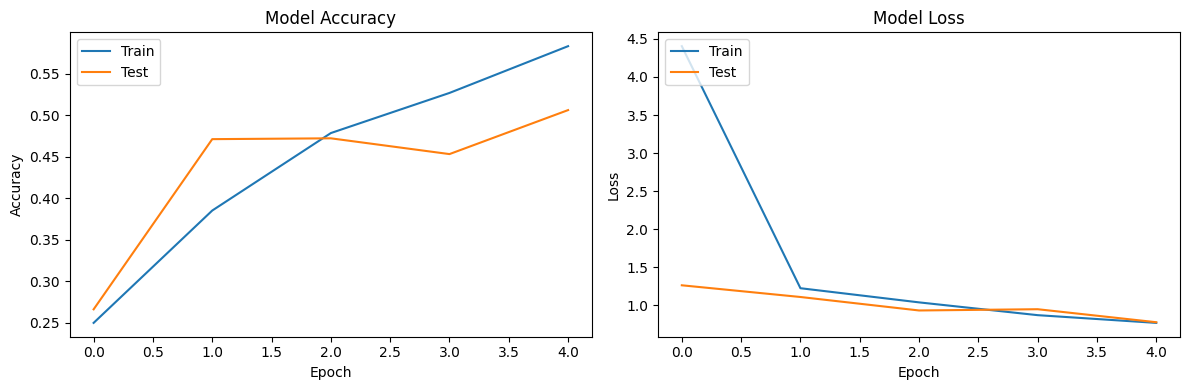

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 39s 1s/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.506

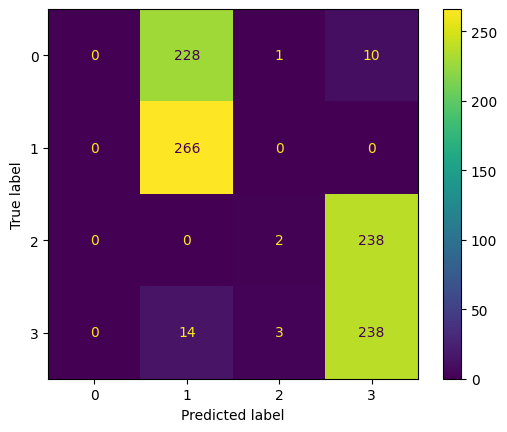

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

ResNet-18


In [ ]:
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input
from keras.models import Model
from keras.utils import to_categorical



def conv_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def ResNet18(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    x = conv_block(input_img, 64, (7, 7), strides=(2, 2), padding='same')
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))

    x = conv_block(x, 128, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 128, (3, 3))
    x = identity_block(x, 128, (3, 3))

    x = conv_block(x, 256, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 256, (3, 3))
    x = identity_block(x, 256, (3, 3))

    x = conv_block(x, 512, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 512, (3, 3))
    x = identity_block(x, 512, (3, 3))

    x = AveragePooling2D((7, 7), name='avg_pool')(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='resnet18')
    return model

# Create ResNet-18 model with input shape (224, 224, 1)
resnet_model = ResNet18(input_shape=(224, 224, 1))
resnet_model.summary()


# Create ResNet-18 model
model = ResNet18()
model.summary()

Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 112, 112, 64)         3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d_10[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define ResNet-18 model
model = ResNet18()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 5,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/5
94/94 [==============================] - 1151s 12s/step - loss: 0.9758 - accuracy: 0.5390 - val_loss: 64.1761 - val_accuracy: 0.2390
Epoch 2/5
94/94 [==============================] - 1067s 11s/step - loss: 0.7164 - accuracy: 0.6207 - val_loss: 21.1898 - val_accuracy: 0.2390
Epoch 3/5
94/94 [==============================] - 1128s 12s/step - loss: 0.7021 - accuracy: 0.6267 - val_loss: 5.5577 - val_accuracy: 0.3730
Epoch 4/5
94/94 [==============================] - 1132s 12s/step - loss: 0.6927 - accuracy: 0.6337 - val_loss: 76.9656 - val_accuracy: 0.2370
Epoch 5/5
94/94 [==============================] - 1069s 11s/step - loss: 0.6645 - accuracy: 0.6467 - val_loss: 7.2408 - val_accuracy: 0.4320


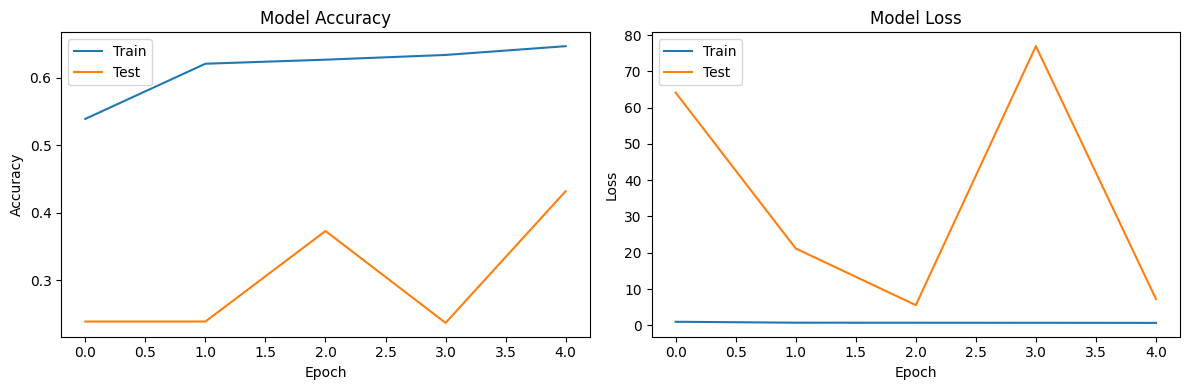

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 87s 3s/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.432

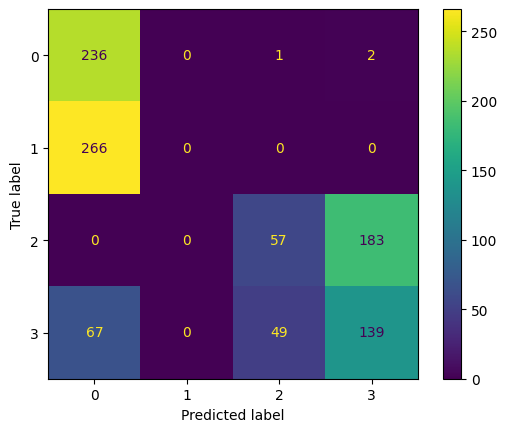

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Google Net

In [ ]:
import tensorflow
from keras import layers, models
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, Concatenate

from keras.models import Model
from keras.utils import to_categorical


def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    return output

def GoogLeNet(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # First Convolutional Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second Convolutional Layer
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception Modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Average Pooling and Dropout
    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)

    # Output Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='googlenet')
    return model

# Create GoogLeNet model with input shape (224, 224, 1)
googlenet_model = GoogLeNet(input_shape=(224, 224, 1))
googlenet_model.summary()

Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_73 (Conv2D)          (None, 112, 112, 64)         3200      ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 64)           0         ['conv2d_73[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_74 (Conv2D)          (None, 56, 56, 64)           4160      ['max_pooling2d_9[0][0

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define GoogLe Net model
model = GoogLeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 5,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/5
94/94 [==============================] - 850s 9s/step - loss: 1.8087 - accuracy: 0.3287 - val_loss: 0.8233 - val_accuracy: 0.5260
Epoch 2/5
94/94 [==============================] - 806s 9s/step - loss: 0.8472 - accuracy: 0.4947 - val_loss: 0.7060 - val_accuracy: 0.5610
Epoch 3/5
94/94 [==============================] - 777s 8s/step - loss: 0.7166 - accuracy: 0.5913 - val_loss: 0.6523 - val_accuracy: 0.6640
Epoch 4/5
94/94 [==============================] - 803s 9s/step - loss: 0.6813 - accuracy: 0.6293 - val_loss: 0.6412 - val_accuracy: 0.5870
Epoch 5/5
94/94 [==============================] - 775s 8s/step - loss: 0.6503 - accuracy: 0.6370 - val_loss: 0.7386 - val_accuracy: 0.5300


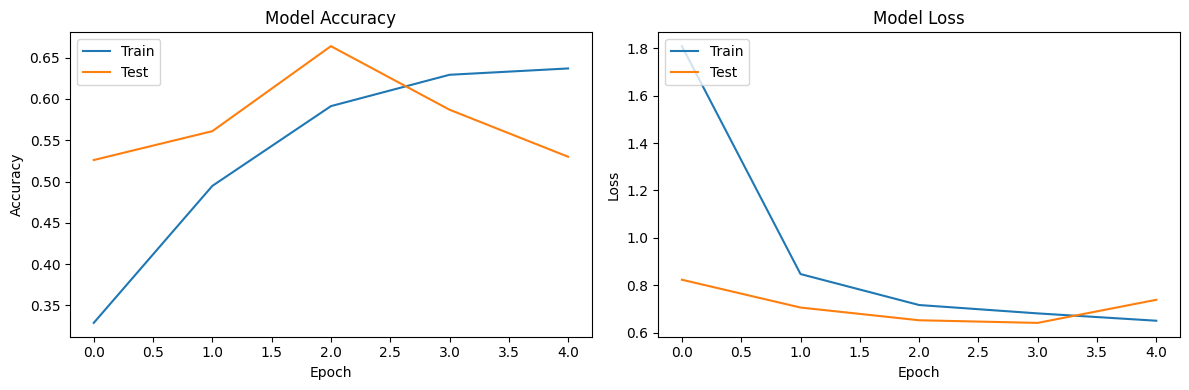

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 60s 2s/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.53

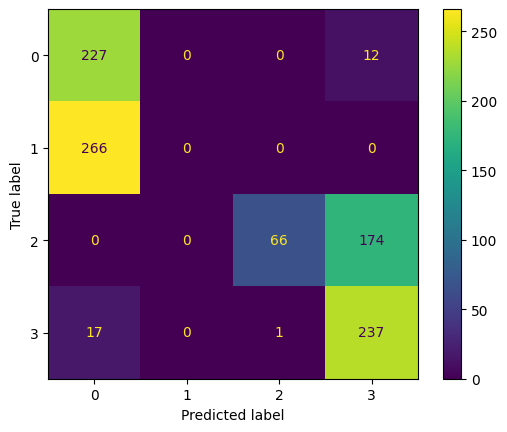

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Inception V3

In [6]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, AveragePooling2D, Flatten, Dense
from keras.models import Model

def InceptionV3(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Stem
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='valid')(input_img)
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception blocks
    x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Add more inception blocks here...

    # Classification head
    x = AveragePooling2D((4, 4))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='inceptionv3')
    return model

def inception_block(x, filters):
    """
    Creates an Inception block with parallel convolutions.
    """
    branch1x1 = Conv2D(filters[0], (1, 1), activation='relu')(x)

    branch3x3 = Conv2D(filters[1], (1, 1), activation='relu')(x)
    branch3x3 = Conv2D(filters[2], (3, 3), activation='relu', padding='same')(branch3x3)

    branch5x5 = Conv2D(filters[3], (1, 1), activation='relu')(x)
    branch5x5 = Conv2D(filters[4], (5, 5), activation='relu', padding='same')(branch5x5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[5], (1, 1), activation='relu')(branch_pool)

    return concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)

# Create InceptionV3 model with input shape (224, 224, 1)
inceptionv3_model = InceptionV3(input_shape=(224, 224, 1))
inceptionv3_model.summary()


Model: "inceptionv3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 109, 109, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 109, 109, 64)         18496     ['conv2d_1[0][0]']            
                                                                                        

In [7]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define VGG-19 model
model = InceptionV3()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [12]:
hist = model.fit(xtrain,ytrain,epochs = 5,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/5
94/94 [==============================] - 1081s 11s/step - loss: 1.8717 - accuracy: 0.3907 - val_loss: 1.0039 - val_accuracy: 0.4540
Epoch 2/5
94/94 [==============================] - 1133s 12s/step - loss: 0.9505 - accuracy: 0.5037 - val_loss: 0.7804 - val_accuracy: 0.5820
Epoch 3/5
94/94 [==============================] - 1057s 11s/step - loss: 0.6964 - accuracy: 0.6520 - val_loss: 0.4840 - val_accuracy: 0.8180
Epoch 4/5
94/94 [==============================] - 1063s 11s/step - loss: 0.5060 - accuracy: 0.7767 - val_loss: 0.3391 - val_accuracy: 0.8420
Epoch 5/5
94/94 [==============================] - 1136s 12s/step - loss: 0.5862 - accuracy: 0.7613 - val_loss: 0.5254 - val_accuracy: 0.7520


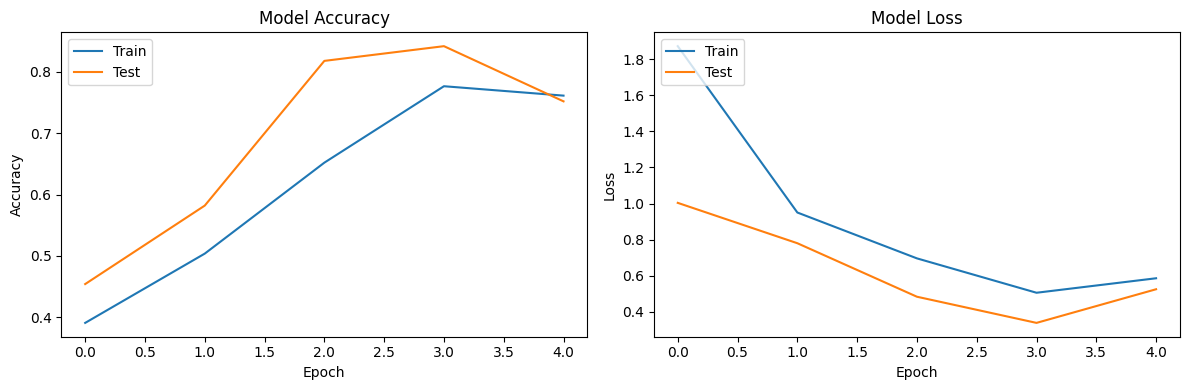

In [19]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [20]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 93s 3s/step


In [15]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(ytest,ypred)

0.752

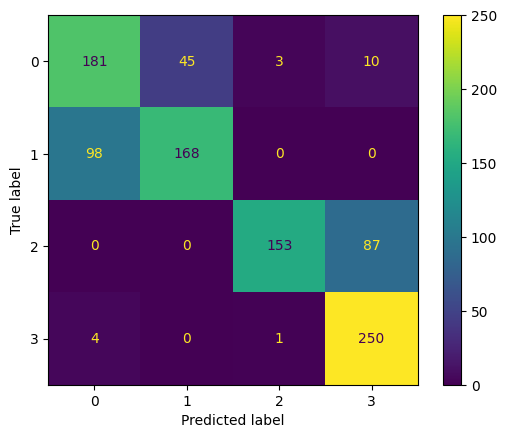

In [18]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Squeeze Net

In [21]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Activation
from keras.models import Model

def SqueezeNet(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(64, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_img)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Fire modules
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = fire_module(x, squeeze=64, expand=256)

    # Classification head
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = AveragePooling2D(pool_size=(13, 13))(x)
    x = Flatten()(x)
    x = Activation('softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='squeezenet')
    return model

def fire_module(x, squeeze, expand):
    """
    Creates a Fire module consisting of squeeze and expand layers.
    """
    squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x)

    expanded_1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed)
    expanded_3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeezed)

    output = concatenate([expanded_1x1, expanded_3x3], axis=-1)
    return output

# Create SqueezeNet model with input shape (224, 224, 1)
squeezenet_model = SqueezeNet(input_shape=(224, 224, 1))
squeezenet_model.summary()


Model: "squeezenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 111, 111, 64)         640       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 55, 55, 64)           0         ['conv2d_30[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_31 (Conv2D)          (None, 55, 55, 16)           1040      ['max_pooling2d_8[0][

In [22]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define SqueezeNet model
model = SqueezeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [23]:
hist = model.fit(xtrain,ytrain,epochs = 5,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/5
94/94 [==============================] - 257s 3s/step - loss: 1.7457 - accuracy: 0.2743 - val_loss: 1.3067 - val_accuracy: 0.2750
Epoch 2/5
94/94 [==============================] - 235s 3s/step - loss: 1.1614 - accuracy: 0.3950 - val_loss: 0.9352 - val_accuracy: 0.4630
Epoch 3/5
94/94 [==============================] - 242s 3s/step - loss: 0.8108 - accuracy: 0.4963 - val_loss: 0.9147 - val_accuracy: 0.5050
Epoch 4/5
94/94 [==============================] - 242s 3s/step - loss: 0.7698 - accuracy: 0.5483 - val_loss: 0.7235 - val_accuracy: 0.5050
Epoch 5/5
94/94 [==============================] - 266s 3s/step - loss: 0.7540 - accuracy: 0.5650 - val_loss: 0.6945 - val_accuracy: 0.6330


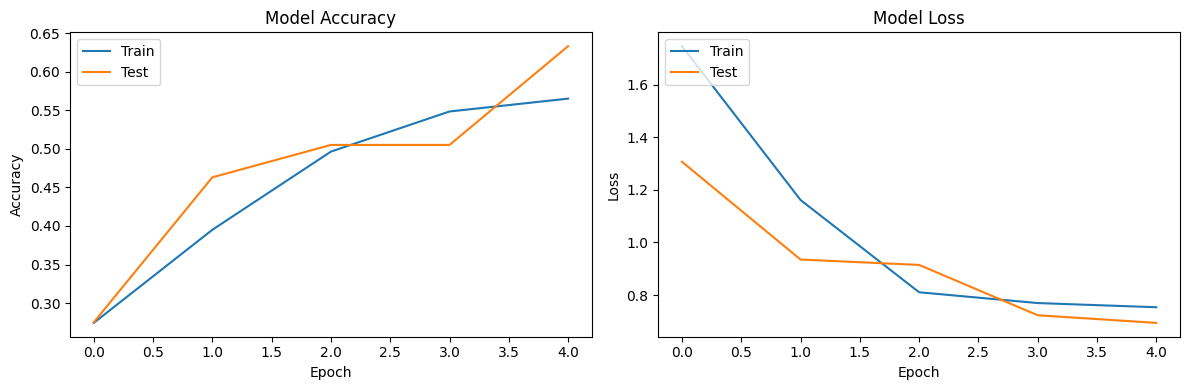

In [24]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [25]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 18s 566ms/step


In [26]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(ytest,ypred)

0.633

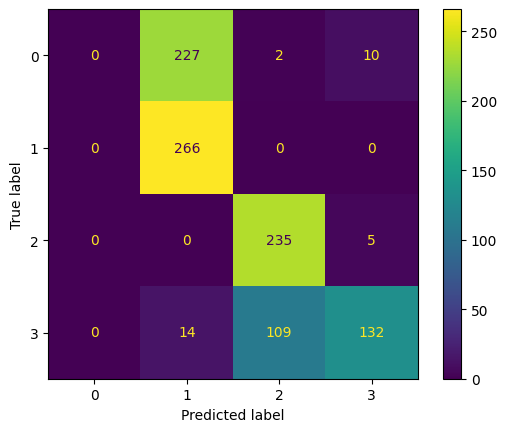

In [29]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

VGG 19

In [30]:
import tensorflow
from keras import layers, models
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, Concatenate

from keras.models import Model
from keras.utils import to_categorical


def VGG19(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='vgg19')
    return model

# Create VGG-19 model with input shape (224, 224, 1)
vgg19_model = VGG19(input_shape=(224, 224, 1))
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_82 (Conv2D)          (None, 224, 224, 64)      640       
                                                                 
 conv2d_83 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_85 (Conv2D)          (None, 112, 112, 128)     147584    
                                                             

In [31]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define VGG-19 model
model = VGG19()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)

In [33]:
hist = model.fit(xtrain,ytrain,epochs = 2,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/2
94/94 [==============================] - 8043s 86s/step - loss: 1.8916 - accuracy: 0.3147 - val_loss: 1.1309 - val_accuracy: 0.4000
Epoch 2/2
94/94 [==============================] - 7951s 85s/step - loss: 0.8762 - accuracy: 0.4980 - val_loss: 0.9595 - val_accuracy: 0.4650


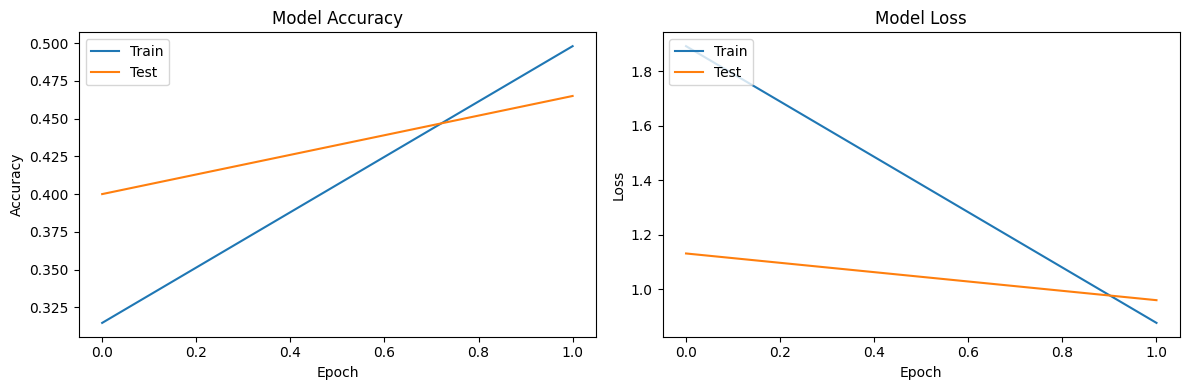

In [34]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [35]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

32/32 [==============================] - 688s 22s/step


In [36]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(ytest,ypred)

0.465

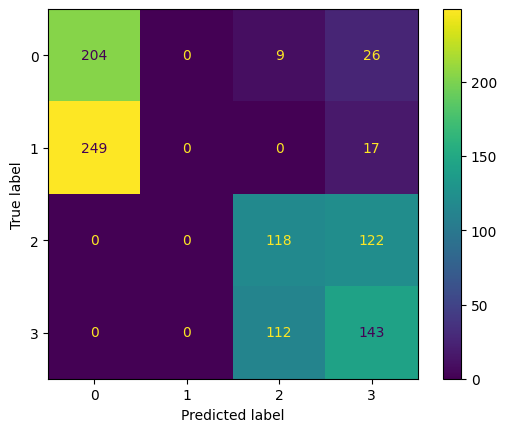

In [39]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Comparing


Text(0.5, 1.0, 'Model Accuracy Comparison')

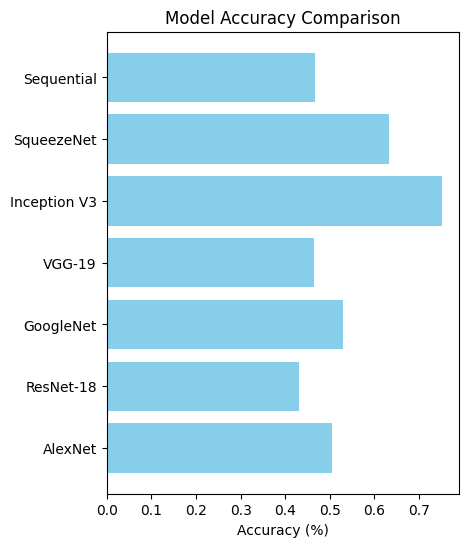

In [40]:
import matplotlib.pyplot as plt

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet','VGG-19', 'Inception V3', 'SqueezeNet','Sequential']

# Accuracy values
accuracy = [0.5060,0.4320,0.5300,0.4650,0.7520,0.6330,0.467]

# Loss values
loss = [0.7752,7.2406,0.7386,0.9595,0.5254,0.6945,1.2467]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Loss plot

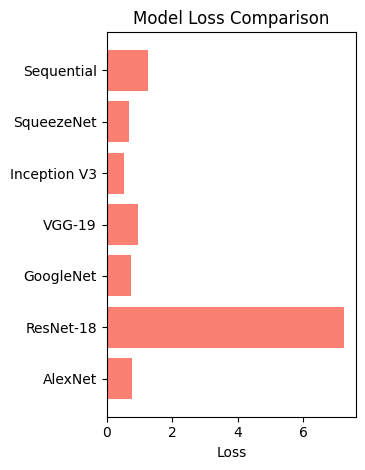

In [41]:
plt.subplot(1, 2, 2)
plt.barh(models, loss, color='salmon')
plt.xlabel('Loss')
plt.title('Model Loss Comparison')

plt.tight_layout()
plt.show()